In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load the data
df= pd.read_csv('/Users/sascha/Library/Mobile Documents/com~apple~CloudDocs/Uni_Tübingen/Semester1/NeuralModelling/Assignments/Assignment9/exercise4_trial_positions.csv')
# replace NaN values with 'None'
df['feedback_type'] = df['feedback_type'].fillna('None')
# add col trial type
df['trial_type'] = np.nan

j = 0
for i in range(len(df)):
    if j < 10:
        df['trial_type'][i] = 'pre'
        j += 1
    elif j < 40 and i >= 10:
        df['trial_type'][i] = 'main'
        j += 1
    elif j >= 40:
        df['trial_type'][i] = 'post'
        if j == 50:
            j = 0
        else:
            j += 1
        
df.head(50)

df['feedback_type'][0:50] = 'endpos1'
df['feedback_type'][50:100] = 'endpos2'
df['feedback_type'][100:150] = 'endpos3'
df['feedback_type'][150:200] = 'endpos4'
df[df['feedback_type'] == 'endpos']

/var/folders/_w/fvv3yfg57mj4b3g4yftq72cr0000gn/T/ipykernel_1389/3867676392.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trial_type'][i] = 'pre'
/var/folders/_w/fvv3yfg57mj4b3g4yftq72cr0000gn/T/ipykernel_1389/3867676392.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feedback_type'][0:50] = 'endpos1'
/var/folders/_w/fvv3yfg57mj4b3g4yftq72cr0000gn/T/ipykernel_1389/3867676392.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,x,y,block,trial_in_block,perturbation,score,feedback_type,distance_to_green_triangle,ref_point,trial_type



### Mean and Standard Deviation for each feedback type and perturbation type###

   feedback_type trial_type        mean         std
0        endpos1       main  388.254977  138.593676
1        endpos1       post  238.822094  158.489837
2        endpos1        pre  336.220873  166.717788
3        endpos2       main  401.704076  251.877512
4        endpos2       post  384.526351  145.125736
5        endpos2        pre  391.954071  275.287007
6        endpos3       main  652.834608  386.619785
7        endpos3       post  604.700146  335.861867
8        endpos3        pre  638.729766  519.762638
9        endpos4       main  851.477815  563.963222
10       endpos4       post  582.428847  407.120517
11       endpos4        pre  778.126874  447.390395


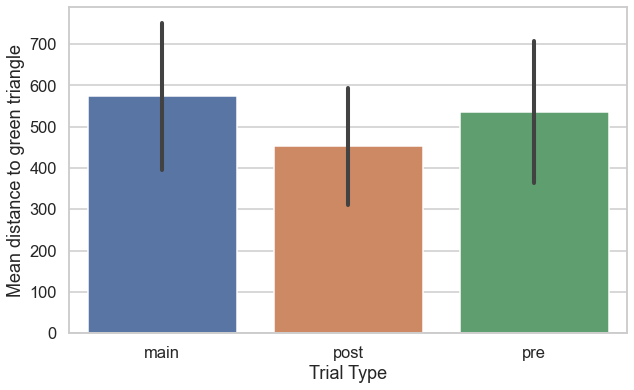

In [58]:
# Calculate summary statistics
summary_main = df.groupby(['feedback_type', 'trial_type'])['distance_to_green_triangle'].agg(['mean', 'std']).reset_index()
print("\n### Mean and Standard Deviation for each feedback type and perturbation type###\n")
print(summary_main)

# Set Seaborn theme
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary_main, 
    x='trial_type', 
    y='mean'
)

# Labels
plt.xlabel('Trial Type')
plt.ylabel('Mean distance to green triangle')
# legend outside figure
#plt.legend(title='Feedback Type', bbox_to_anchor=(1.3, 1), loc='upper right', )

# Show plot
plt.show()